# Парсинг конлангов

Подключаем библиотеки

In [1]:
import requests  
from lxml import html  
import sys  
import urlparse
import pandas as pd
import numpy as np
import time
import os

Открываем файл и сохраняем только строчку, содержащую   div class=\'list report\'

In [2]:
with open('/Users/Anna/Desktop/conworkshop.info.webarchive','r') as webfile:
    for line in webfile.readlines():
        if 'div class=\'list report\'' in line:
            text = line

In [3]:
#длина строчки, с которой будем работать
len(text)

2028303

In [4]:
text = text.split('<div class=\'list report\'>') #разделяем один большой тект на массив языков

Выделяем в тексте: автор, ссылка на профиль автора, имя конланга, ссылка на профиль конланга, статус, тип

In [5]:
language_conlang_profile = list()
conlang_status = list()
conlang_type = list()
language_name = list()
language_creator = list()
language_creator_profile = list()
for index in range(1,len(text)):
    language_conlang_profile.append('http://conworkshop.info/' + text[index].split('<a href=\'')[1].split('\'>')[0])
    conlang_status.append(text[index].split('</span>')[-4].split('>')[-1])
    conlang_type.append(text[index].split('</span>')[-2].split('>')[-1])
    language_name.append(text[index].split('</a></span>')[0].split('>')[-1])
    language_creator.append(text[index].split('</a></span>')[-2].split('>')[-1])
    language_creator_profile.append('http://conworkshop.info/' + text[index].split('</a></span>')[-2].split('href=\'')[1].split('\'')[0])

Отдельные списки собираем в один DataFrame

In [6]:
Data = pd.DataFrame(columns = ['language_name','language_creator', 'conlang_status','conlang_type','language_creator_profile','language_conlang_profile'],
                   data = np.array([language_name,language_creator, conlang_status,conlang_type,language_creator_profile,language_conlang_profile]).transpose()
                   )

In [7]:
Data.to_csv('conlang.csv') #сохраняем

In [8]:
Data.head(5)

,language_name,language_creator,conlang_status,conlang_type,language_creator_profile,language_conlang_profile
0,Fuzzitan,Majicturtol,New,Proto-Conlang,http://conworkshop.info/view_profile.php?m=S69...,http://conworkshop.info/view_language.php?l=UOE
1,&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ
2,&apos;Sor-Sar&apos;,Hanian,New,Other,http://conworkshop.info/view_profile.php?m=S11...,http://conworkshop.info/view_language.php?l=ZOR
3,(Desert) Elvish,Cestion,Functional,A priori,http://conworkshop.info/view_profile.php?m=S38...,http://conworkshop.info/view_language.php?l=EL2
4,(English Name Not Created Yet),mayxuli,New,A priori,http://conworkshop.info/view_profile.php?m=S11...,http://conworkshop.info/view_language.php?l=SJT


# Парсим Типологию

In [11]:
import mechanize
br = mechanize.Browser()
#br.set_all_readonly(False)    # allow everything to be written to
br.set_handle_robots(False)   # ignore robots
br.set_handle_refresh(False)  # can sometimes hang without this
br.addheaders =   [('User-agent', 'Firefox')]

In [6]:
response = requests.get('http://nhfancy@mail.ru:41601811@conworkshop.info/conlangs.php')
parsed_body = html.fromstring(response.text)
#span  = parsed_body.xpath('//a[@class = "button yellow"]/@href')

In [7]:
response.content

'<!DOCTYPE html>\r\n<!--<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">-->\r\n<html lang="en">\r\n<head>\r\n\t<title>Conlangs - ConWorkShop</title>\r\n\t<meta charset="UTF-8">\r\n\r\n\t<meta name="og:title" content="ConWorkShop" />\r\n    <meta name="og:type" content="website" />\r\n    <meta name="og:description"\r\n          content="Conlanging community with tools needed for conlanging" />\r\n    <meta name="og:image" content="http://conworkshop.com/css/fi_blue.png" />\r\n        <meta name="og:url" content="//conworkshop.info/conlangs.php" />\r\n\r\n    <meta name="twitter:card" content="summary" />\r\n    <meta name="twitter:site" content="@_conworkshop" />\r\n    <meta name="twitter:title" content="ConWorkShop" />\r\n    <meta name="twitter:description"\r\n          content="Conlanging community with tools needed for conlanging" />\r\n    <meta name="twitter:image" content="http://conworkshop.com/css/fi_blue.png" />\r\n\r\n\r\n    \r\n  

In [34]:
%%time
#type_href = list()
for i in range(3850,4000):#for i in range(0,len(Data.language_conlang_profile)):
    response = requests.get(Data.language_conlang_profile[i])
    parsed_body = html.fromstring(response.text)
    span  = parsed_body.xpath('//a[@class = "button yellow"]/@href')
    type_href.append(span)

KeyboardInterrupt: 

In [37]:
len(type_href)

3880

In [38]:
hrefs = list()
for i in range(0,len(type_href)):
    for href in type_href[i]:
        if href[0:3] == 'typ':
            hrefs.append(href)

In [40]:
len(hrefs)

1338

In [ ]:
http://conworkshop.info/

In [79]:
statistic = pd.DataFrame()#(data = [], columns = ['language','parameter','value'])

In [80]:
index = 0
for i in range(0,len(hrefs)): #попробовать от 0 до 1
    response = requests.get('http://conworkshop.info/' + hrefs[i])
    parsed_body = html.fromstring(response.text)
    Parameter  = parsed_body.xpath('//div[@class = "list report"]/span/text()')
    Value = parsed_body.xpath('//div[@class = "list report"]/span/b/text()')
    for j in range(0,len(Parameter)):
        statistic = statistic.append(pd.DataFrame(data = [hrefs[i][-3:], Parameter[j], Value[j]]).transpose())

In [83]:
statistic.columns = ['language','parameter','value']

In [84]:
statistic.head(5)

,language,parameter,value
0,DRZ,Pronoun persons,1st/2nd/3rd persons
0,DRZ,Base counting system,Octal (8)
0,DRZ,Coding of evidentiality,Affix or clitic
0,DRZ,Negation marking,Affix
0,DRZ,Noun-adjective order,Adjective first


In [85]:
len(statistic)

58363

In [107]:
statistic.index = range(0,len(statistic))

In [103]:
stat = statistic.copy()

In [99]:
abv = [Data.loc[i].language_conlang_profile.split('=')[1] for i in range(0,len(Data))]

In [100]:
abv = pd.DataFrame(data = abv, columns = ['abv'])

In [101]:
tmp = Data.join(abv)

In [111]:
result = stat.merge(tmp, left_on='language', right_on='abv', how='outer')

In [ ]:
1. языки без типологии conlang status - type?
2. у кого больше всего параметров (у априорных ли и тд) conlang status и type
3. сколько конлангов у каждого параметра (как представить) + 10 самых параметров, а внутри самые популярные value
4. априорные, апостериорные, артланги, ауксланги   - >  количество параметров    -> это второе?
5. разные типы а там по топ 10 параметров

6. value в -  Definite article , Presence of /b/, /d/, and /g/, Presence of /p/, /t/, and /k/, Morphological typology, Indefinite article 



#### 1. языки без типологии conlang status - type

In [187]:
result[result.language.isnull()].groupby('conlang_status').count().language_name

conlang_status
Abandoned        62
Complete         11
Functional       60
New            2292
On hold          81
Progressing     381
Name: language_name, dtype: int64

In [152]:
result[result.language.isnull()].groupby('conlang_type').count().language_name

conlang_type
A posteriori                              410
A priori                                  906
Artistic Language (Artlang)               586
Creole                                     13
Engineered Language (Englang)              51
International Auxiliary Language (IAL)     45
Joke language                              39
Logical Language (Loglang)                 20
Mixed                                     197
Not specified                             331
Other                                      86
Pidgin                                      4
Proto-Conlang                             187
Signed conlang                             12
Name: language_name, dtype: int64

А наоборот? Кажется, это 2

In [154]:
result[result.language.isnull() == False].groupby('conlang_status').count().language_name

conlang_status
Abandoned       1572
Complete         412
Functional      3908
New            24990
On hold         1900
Progressing    25581
Name: language_name, dtype: int64

In [155]:
result[result.language.isnull() == False].groupby('conlang_type').count().language_name

conlang_type
A posteriori                               8561
A priori                                  24474
Artistic Language (Artlang)               11523
Creole                                      432
Engineered Language (Englang)               724
International Auxiliary Language (IAL)      758
Joke language                               422
Logical Language (Loglang)                  304
Mixed                                      3622
Not specified                              2004
Other                                      1276
Pidgin                                       57
Proto-Conlang                              4084
Signed conlang                              122
Name: language_name, dtype: int64

#### 3. сколько конлангов у каждого параметра (как представить) + 10 самых параметров, а внутри самые популярные value

In [195]:
pd.DataFrame(data = result[result.language.isnull() == False].groupby('parameter').count().language_name).sort(['language_name'], ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,language_name
parameter,
"Presence of /b/, /d/, and /g/",1334
Retroflex consonants,1334
Uvular consonants,1334
"Presence of /p/, /t/, and /k/",1334
Consonant-vowel ratio,1282
Vowel inventory size,1279
Consonant inventory size,1278
Genders,1251
Primary writing system,1202


In [194]:
print dt

                                   language_name
parameter                                       
Presence of /b/, /d/, and /g/               1334
Retroflex consonants                        1334
Uvular consonants                           1334
Presence of /p/, /t/, and /k/               1334
Consonant-vowel ratio                       1282
Vowel inventory size                        1279
Consonant inventory size                    1278
Genders                                     1251
Primary writing system                      1202
Noun numbers                                1171
Primary word order                          1161
Definite article                            1111
Indefinite article                          1102
Animacy distinctions                        1080
Morphological typology                      1066
Morphosyntactic alignment                   1057
Noun-adjective order                        1017
Marked tense (verb)                          987
Pronoun persons     

#### 5. разные типы а там по топ 10 параметров

In [170]:
result.head(2)

,language,parameter,value,language_name,language_creator,conlang_status,conlang_type,language_creator_profile,language_conlang_profile,abv
0,DRZ,Pronoun persons,1st/2nd/3rd persons,&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ,DRZ
1,DRZ,Base counting system,Octal (8),&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ,DRZ


In [179]:
i

'Pidgin'

In [183]:
a = {}
for i in result.conlang_type.unique():
    a[i] = pd.DataFrame(data = result[result.conlang_type == i].groupby('parameter').count().language_name).sort(['language_name'], ascending=False)[0:10]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [184]:
a

{'A posteriori':                                language_name
 parameter                                   
 Presence of /b/, /d/, and /g/            193
 Retroflex consonants                     193
 Uvular consonants                        193
 Presence of /p/, /t/, and /k/            193
 Consonant inventory size                 186
 Consonant-vowel ratio                    185
 Vowel inventory size                     184
 Primary writing system                   182
 Genders                                  182
 Primary word order                       171,
 'A priori':                                language_name
 parameter                                   
 Presence of /b/, /d/, and /g/            516
 Presence of /p/, /t/, and /k/            516
 Retroflex consonants                     516
 Uvular consonants                        516
 Vowel inventory size                     503
 Consonant inventory size                 503
 Consonant-vowel ratio                    503
 Gend

#### 6. value в -  Definite article , Presence of /b/, /d/, and /g/, Presence of /p/, /t/, and /k/, Morphological typology, Indefinite article

In [ ]:
result.value.unique()

In [190]:
int_param = ['Definite article', 'Presence of /b/, /d/, and /g/', 'Presence of /p/, /t/, and /k/', 'Morphological typology', 'Indefinite article']

In [191]:
b = {}
for i in int_param:
    b[i] = pd.DataFrame(data = result[result.parameter == i].groupby('value').count().language_name).sort(['language_name'], ascending=False)[0:10]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [192]:
b

{'Definite article':                            language_name
 value                                   
 None                                 419
 Distinct article                     332
 Affix used                           206
 Word for 'this/that' used            150
 Other                                  4,
 'Indefinite article':                      language_name
 value                             
 None                           610
 Distinct article               207
 Word for 'one' used            183
 Affix used                     101
 Other                            1,
 'Morphological typology':                 language_name
 value                        
 Agglutinative             382
 Fusional                  293
 Analytical                178
 Synthetic                 137
 Polysynthetic              72
 Oligosynthetic              4,
 'Presence of /b/, /d/, and /g/':                    language_name
 value                           
 /b/, /d/, and /g/            759


In [143]:
result[result.parameter == 'Morphological typology'].value.unique()

array(['Agglutinative', 'Polysynthetic', 'Synthetic', 'Fusional',
       'Analytical', 'Oligosynthetic'], dtype=object)

In [136]:
result

,language,parameter,value,language_name,language_creator,conlang_status,conlang_type,language_creator_profile,language_conlang_profile,abv
0,DRZ,Pronoun persons,1st/2nd/3rd persons,&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ,DRZ
1,DRZ,Base counting system,Octal (8),&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ,DRZ
2,DRZ,Coding of evidentiality,Affix or clitic,&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ,DRZ
3,DRZ,Negation marking,Affix,&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ,DRZ
4,DRZ,Noun-adjective order,Adjective first,&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ,DRZ
5,DRZ,Animacy distinctions,Animate/Inanimate,&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ,DRZ
6,DRZ,Primary writing system,Basic Latin,&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ,DRZ
7,DRZ,Consonant inventory size,Average,&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ,DRZ
8,DRZ,Marked tense (verb),"Past, Present, Future",&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ,DRZ
9,DRZ,Definite article,Word for 'this/that' used,&apos;DraUz,Dolfyn,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S62...,http://conworkshop.info/view_language.php?l=DRZ,DRZ


In [135]:
result[result.language.isnull()]

,language,parameter,value,language_name,language_creator,conlang_status,conlang_type,language_creator_profile,language_conlang_profile,abv
58363,NaN,NaN,NaN,Fuzzitan,Majicturtol,New,Proto-Conlang,http://conworkshop.info/view_profile.php?m=S69...,http://conworkshop.info/view_language.php?l=UOE,UOE
58364,NaN,NaN,NaN,&apos;Sor-Sar&apos;,Hanian,New,Other,http://conworkshop.info/view_profile.php?m=S11...,http://conworkshop.info/view_language.php?l=ZOR,ZOR
58365,NaN,NaN,NaN,(Desert) Elvish,Cestion,Functional,A priori,http://conworkshop.info/view_profile.php?m=S38...,http://conworkshop.info/view_language.php?l=EL2,EL2
58366,NaN,NaN,NaN,(English Name Not Created Yet),mayxuli,New,A priori,http://conworkshop.info/view_profile.php?m=S11...,http://conworkshop.info/view_language.php?l=SJT,SJT
58367,NaN,NaN,NaN,(Not Named Yet),solrigg,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S96...,http://conworkshop.info/view_language.php?l=GL1,GL1
58368,NaN,NaN,NaN,--,språk,New,Artistic Language (Artlang),http://conworkshop.info/view_profile.php?m=S85...,http://conworkshop.info/view_language.php?l=RSA,RSA
58369,NaN,NaN,NaN,--,otallis,New,Mixed,http://conworkshop.info/view_profile.php?m=S70...,http://conworkshop.info/view_language.php?l=UKI,UKI
58370,NaN,NaN,NaN,---,BleuPomme,New,International Auxiliary Language (IAL),http://conworkshop.info/view_profile.php?m=S90...,http://conworkshop.info/view_language.php?l=INO,INO
58371,NaN,NaN,NaN,4Phonemes,Idkgamer,New,Engineered Language (Englang),http://conworkshop.info/view_profile.php?m=S32...,http://conworkshop.info/view_language.php?l=TPH,TPH
58372,NaN,NaN,NaN,9 Phonemes,sphi,New,Not specified,http://conworkshop.info/view_profile.php?m=S43...,http://conworkshop.info/view_language.php?l=NPQ,NPQ


In [118]:
len(result)

61250

In [114]:
len(stat)

58363

# Парсим языки и авторов

In [9]:
Data.language_conlang_profile[0]

'http://conworkshop.info/view_language.php?l=UOE'

## Парсим авторов

In [11]:
Data.language_creator_profile[1]

'http://conworkshop.info/view_profile.php?m=S6211260331'

In [12]:
response = requests.get(Data.language_creator_profile[1])
parsed_body = html.fromstring(response.text)
languages_know  = parsed_body.xpath('//div//text()')
#td = parsed_body.xpath('//td/text()')

In [13]:
response.content

'<!DOCTYPE html>\r\n<!--<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">-->\r\n<html lang="en">\r\n<head>\r\n\t<title>View profile - ConWorkShop</title>\r\n\t<meta charset="UTF-8">\r\n\r\n\t<meta name="og:title" content="ConWorkShop" />\r\n    <meta name="og:type" content="website" />\r\n    <meta name="og:description"\r\n          content="Conlanging community with tools needed for conlanging" />\r\n    <meta name="og:image" content="http://conworkshop.com/css/fi_blue.png" />\r\n        <meta name="og:url" content="//conworkshop.info/view_profile.php?m=S6211260331" />\r\n\r\n    <meta name="twitter:card" content="summary" />\r\n    <meta name="twitter:site" content="@_conworkshop" />\r\n    <meta name="twitter:title" content="ConWorkShop" />\r\n    <meta name="twitter:description"\r\n          content="Conlanging community with tools needed for conlanging" />\r\n    <meta name="twitter:image" content="http://conworkshop.com/css/fi_blue.png" />

In [307]:
languages_know

['cws',
 '\r\n\t',
 '\r\n\t\t',
 '\r\n\r\n\t\t\t',
 "\n\t\t\t@font-face {\n\t\t\t\tfont-family: caeccaadfbbccs;\n\t\t\t\tsrc: url('ttf/QKV_1482364575.ttf?#iefix') format('truetype');\n\t\t\t}\n\t\t\t.cs_caeccaadfbbc95{\n\t\t\t\tfont-family: caeccaadfbbccs;\n\t\t\t\tfont-size: 1.2em !important;\n\t\t\t}\n\t\t\t",
 '\t\t\t',
 '\r\n\t\t\t',
 u'knyvok~\u015bop~',
 '\t\t\t',
 '\r\n\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t',
 '(Akuveth)',
 '\r\n\t\t\t\t',
 '\r\n\t\t\t\r\n\t\t\t\t\t\t\r\n\t\t\t',
 '\r\n\r\n\t\t\t\r\n\t\t\t\t\t\t\t',
 'Greetings Guest',
 '\r\n\t\t\t\t\t\t\r\n\t\t',
 '\r\n\r\n\t',
 '\r\n\r\n\t',
 '\r\n\t\t\n\n',
 '\n\t',
 'Home',
 '\n\t',
 'Browse',
 '\n\t\t',
 '\n\t\t\t',
 'Conlangs',
 '\n\t\t\t',
 'Dictionaries',
 '\n\t\t\t',
 'All articles',
 '\n\t\t\t',
 'Typological database',
 '\n\t\t',
 '\n\t',
 '\n\t',
 'About',
 '\n\t',
 'Login',
 '\n\t',
 'Register',
 '\n',
 '\n\n\t',
 '\r\n\r\n\r\n\t',
 '\r\n\t\t\r\n\t\t\r\n\t',
 '\r\n\t\t\t\t\r\n\t\t\r\n\t\t\t',
 '\t\r\n\t

## Парсим языки

In [ ]:
%%time
Data_con = list()
for i in range(0,len(Data.language_conlang_profile)):
    response = requests.get(Data.language_conlang_profile[i])
    parsed_body = html.fromstring(response.text)
    span  = parsed_body.xpath('//span[@class = "faux"]/text()')
    td = parsed_body.xpath('//td/text()')
    Data_con.append(td)

In [65]:
dfile = open('languages.txt','w')
for i in range(0,len(Data_con)):
    for j in range(0,len(Data_con[i])):
        dfile.write((Data_con[i][j] + ' ').encode('utf-8'))
    dfile.write('\n')
dfile.close()

In [11]:
languages = "".join(open('languages.txt')).split("\n")

In [50]:
feature2 = list()
for language in languages:
    if ('Central' in language) or ('Front' in language) or ('Back' in language) or ('Near-' in languages):
        feature2.append(0)

In [51]:
len(languages)

4245

In [52]:
len(feature2)

3864

In [40]:
languages

['Bilabial Labio- dental Dental Alveolar Post- Alveolar Velar Plosive p b \xc2\xa0 \xc2\xa0 t d \xc2\xa0 k g Fricative \xc2\xa0 f v \xce\xb8 \xc3\xb0 s z \xca\x83 \xca\x92 \xc2\xa0 Click \xc2\xa0 \xc2\xa0 \xc7\x80 \xc2\xa0 \xc2\xa0 \xc2\xa0 Front Back Close i y u Close-mid e \xc3\xb8 o Near-open \xc3\xa6 \xc2\xa0 Open a \xc2\xa0 Orthography \xe2\x9c\x96 Unknown alphabetical order ',
 'Bilabial Labio- dental Dental Alveolar Post- Alveolar Alveolo- palatal Palatal Labio- velar Velar Glottal Nasal m \xc2\xa0 \xc2\xa0 n \xc2\xa0 \xc2\xa0 \xc2\xa0 \xc2\xa0 \xc2\xa0 \xc2\xa0 Plosive \xc2\xa0 \xc2\xa0 \xc2\xa0 d \xc2\xa0 \xc2\xa0 \xc2\xa0 \xc2\xa0 k g \xc2\xa0 Fricative \xc9\xb8 v \xce\xb8 \xc3\xb0 s z \xca\x83 \xca\x92 \xc2\xa0 \xc2\xa0 \xc2\xa0 \xc2\xa0 h Affricate \xc2\xa0 \xc2\xa0 \xc2\xa0 \xc2\xa0 d\xcd\xa1\xca\x92 t\xcd\xa1\xc9\x95 \xc2\xa0 \xc2\xa0 \xc2\xa0 \xc2\xa0 Approximant \xc2\xa0 \xc2\xa0 \xc2\xa0 \xc2\xa0 \xc2\xa0 \xc2\xa0 j w \xc2\xa0 \xc2\xa0 Flap \xc2\xa0 \xc2\xa0 \xc2\xa0 \

In [56]:
feature1 = list()
for language in languages:
    if ('Front' in language) and ('Back' in language):
        feature1.append(3)
    else:
        if 'Front' in language:
            feature1.append(1)
        if 'Back' in language:
            feature1.append(2)
    if ((('Front' in language) or ('Back' in language)) == False) and ('Central' in language):
        feature1.append(4)
    if (('Front' in language) or ('Back' in language) or ('Central' in language)) == False:
        feature1.append(0)

In [58]:
feature2 = list()
for language in languages:
    if ('front' in language) and ('back' in language):
        feature2.append(3)
    else:
        if 'front' in language:
            feature2.append(1)
        if 'back' in language:
            feature2.append(2)
    if (('front' in language) or ('back' in language)) == False:
        feature2.append(0)

In [60]:
feature3 = list()
for language in languages:
    if ('Central' in language):
        feature3.append(1)
    else:
        feature3.append(0)

In [ ]:
languages = "".join(open('languages.txt')).split("\n")
features = list()
featureTMP = list()
for language in languages:
    if ('Central' in language):
        featureTMP.append(1)
    else:
        featureTMP.append(0)
features.append(featureTMP)


featureTMP = list()
for language in languages:
    if ('Central' in language):
        featureTMP.append(1)
    else:
        featureTMP.append(0)
features.append(featureTMP)



In [ ]:
e ɪ

In [67]:
for i in range(0,10):
    print languages[i]
        #print 'hahaha'

Bilabial Labio- dental Dental Alveolar Post- Alveolar Velar Plosive p b     t d   k g Fricative   f v θ ð s z ʃ ʒ   Click     ǀ       Front Back Close i y u Close-mid e ø o Near-open æ   Open a   Orthography ✖ Unknown alphabetical order 
Bilabial Labio- dental Dental Alveolar Post- Alveolar Alveolo- palatal Palatal Labio- velar Velar Glottal Nasal m     n             Plosive       d         k g   Fricative ɸ v θ ð s z ʃ ʒ         h Affricate         d͡ʒ t͡ɕ         Approximant             j w     Flap       ɾ             Click       ǃ             dɾ Front Near- front Central Back Close i     u Near-close   ɪ     Close-mid       o Mid     ə   Open-mid ɛ       Near-open æ   ɐ   Open       ɑ Orthography ✖ Unknown alphabetical order Coding of evidentiality Marked tense (verb) Primary word order Animacy distinctions Primary writing system 
Bilabial Alveolar Velar Uvular Nasal m n     Plosive p b t d g   Fricative   s z   ʁ Front Central Near- back Back Close i     u Near-close     ʊ   Close

In [102]:
feature4 = list() 
for language in languages:  
    if ((' i ' in language) == False) and ((' ɛ ' in language) == False) and ((' e ' in language) or (' ɪ ' in language)): 
        feature4.append(6)

In [103]:
len(feature4)

189

In [74]:
feature4 = list()
for language in languages:
    

IndentationError: expected an indented block (<ipython-input-74-a3d5d24b8500>, line 3)

In [59]:
len(feature2)# == len(languages)

4245

In [18]:
len(languages)

4245

# Графики и статистика

In [169]:
import seaborn
import matplotlib.pyplot as plt

In [185]:
d = Data.groupby(['conlang_status']).size()
d2 = Data.groupby(['conlang_type']).size()

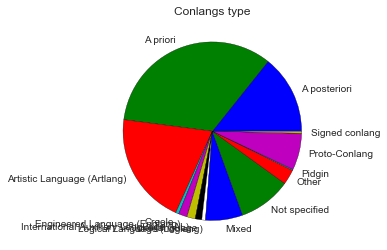

In [186]:
%matplotlib inline

plt.subplot(aspect = True)
plt.pie(d2,labels = d2.index.values)
plt.title("Conlangs type")

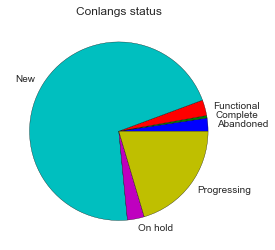

In [176]:
%matplotlib inline

plt.subplot(aspect = True)
plt.pie(d,labels = d.index.values)
plt.title("Conlangs status")

In [179]:
Data.head(1)

,language_name,language_creator,conlang_status,conlang_type,language_creator_profile,language_conlang_profile
0,Fuzzitan,Majicturtol,New,Proto-Conlang,http://conworkshop.info/view_profile.php?m=S69...,http://conworkshop.info/view_language.php?l=UOE


In [184]:
print Data.language_creator.nunique()
print len(Data)

1691
4225


In [193]:
from collections import Counter
c = Counter({el: count for el, count in Counter(Data.language_creator).items() if count > 1})

In [298]:
list_names = list()
for ind in range(0,len(c.items())):
    list_names.append(c.items()[ind][0])
list_count = list()
for ind in range(0,len(c.items())):
    list_count.append(int(c.items()[ind][1]))

In [296]:
list_count

In [256]:
creator_data = pd.DataFrame(columns = ['name','count_conlangs'], data = np.array([list_names, list_count]).transpose())

In [315]:
creator_data

,name,count_conlangs
0,Tàmhas Mac,2
1,nai888,2
2,hihiuk123,3
3,Popp2,2
4,daveh871,2
5,leonjiahuahuang,4
6,Disphenocingulum,2
7,TurkicDragon,9
8,Kawdek,7
9,Enyarel,2
